
# Оцінка та вдосконалення моделі


<h2>Мета</h2>

Ознайомитись з методами оцінки та вдосконалення регресійних моделей. Після завершення цієї лабораторної роботи ви зможете:

* Розділяти дані на навчальну та тестову вибірки
* Використовувати перехресну перевірку для оцінки якості моделі
* Обирати оптимальну складність моделі для уникнення перенавчання
* Вдосконалювати моделі прогнозування за допомогою підбору параметрів


<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>


1. Скачайте дані із файлу <a href="https://drive.google.com/file/d/1wSj5SKRPKOjNPP2cyqaNpxRCinKEmJkO/view?usp=drive_link" target="_blank">'clean_data2.csv'</a> (Data2.csv з виправленими помилками та заповненими пропусками). Запишіть дані у два датафрейми: предиктори (x_data) та відгуки (y_data). Випадковим чином розділіть дані на навчальні та тестові (використайте 20% загального набору в якості тестових даних).
2. Побудуйте модель лінійної одномірної регресії для одного з предикторів, використовуючи навчальні дані. Знайдіть R^2 на навчальних та тестових даних. Чому вони різні і на який з них треба орієнтуватись при виборі моделі?
3. Побудуйте кілька поліноміальних моделей різних ступенів для того ж предиктора. Знайдіть R^2 цих моделей на тестових даних. Яка з моделей краща? При якому ступені полінома спостерігається перенавчання?
4. Побудуйте модель гребеневої регресії для двох найкращих предикторів. Параметр alpha повинен бути встановлений на 10. Обчисліть R^2.
5. Виконайте пошук по сітці для параметра alpha та параметра нормалізації, а потім побудуйте модель, використавши найкращі значення параметрів.

<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Запишіть дані у два датафрейми: предиктори (x_data) та відгуки (y_data). Випадковим чином розділіть дані на навчальні та тестові (використайте 20% загального набору в якості тестових даних).</p>
</div>


In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

Зчитую дані з файлу у датафрейм


In [137]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df = pd.read_csv("clean_data2.csv", encoding='cp1252')
print(df)

              Country Name                      Region  GDP per capita  \
0              Afghanistan                  South Asia      561.778746   
1                  Albania       Europe & Central Asia     4124.982390   
2                  Algeria  Middle East & North Africa     3916.881571   
3           American Samoa         East Asia & Pacific    11834.745230   
4                  Andorra       Europe & Central Asia    36988.622030   
..                     ...                         ...             ...   
212  Virgin Islands (U.S.)   Latin America & Caribbean        6.327732   
213     West Bank and Gaza  Middle East & North Africa     2943.404534   
214            Yemen, Rep.  Middle East & North Africa      990.334774   
215                 Zambia          Sub-Saharan Africa     1269.573537   
216               Zimbabwe          Sub-Saharan Africa     1029.076649   

     Population   CO2 emission       Area     Density  
0      34656032    9809.225000   652860.0   53.083405  

Буду використовувати тільки числові дані


In [138]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
df=df._get_numeric_data()
df.head()

,GDP per capita,Population,CO2 emission,Area,Density
0,561.778746,34656032,9809.225000,652860.0,53.083405
1,4124.982390,2876101,5716.853000,28750.0,100.038296
2,3916.881571,40606052,145400.217000,2381740.0,17.048902
3,11834.745230,55599,31.100793,200.0,277.995000
4,36988.622030,77281,462.042000,470.0,164.427660


Записую дані у два датафрейми: предиктори (x_data) та відгуки (y_data).


In [139]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
y_data = df['CO2 emission']
x_data=df.drop('CO2 emission',axis=1)

Випадковим чином розділяю дані на навчальні та тестові (40% загального набору в якості тестових даних).


In [208]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 44
number of training samples: 173


<a name="task2"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2">Завдання  #2: </h2>

<p>Побудуйте модель лінійної одномірної регресії для одного з предикторів, використовуючи навчальні дані. Знайдіть R^2 на навчальних та тестових даних. Чому вони різні і на який з них треба орієнтуватись при виборі моделі?</p>
</div>


<p>З попередніх робіт знаю, що хорошими показниками для 'CO2 emission' можуть бути:</p>
<ul>
    <li>Population</li>
    <li>Area</li>
</ul>
При цьому одномірна модель для ознаки 1 була кращою. Тому будуватиму моделі, використовуючи саме цю ознаку як предиктор.

<p>Створюю об’єкт лінійної регресії та навчаю модель</p>


In [209]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання

lre = LinearRegression()

x_p_train = x_train[['Population']]
x_p_test = x_test[['Population']]

lre.fit(x_p_train, y_train)

hat1 = lre.predict(x_p_test)

Обчислюю R^2  на навчальних та тестових даних:


In [210]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
from sklearn.metrics import mean_squared_error

r1=lre.score(x_p_test, y_test)
print('The R-square for train data is: ', lre.score(x_p_train, y_train))
print('The R-square for test data is: ', r1)

The R-square for train data is:  0.650231007816344
The R-square for test data is:  0.5394371747125326


<p>Вони різні бо модель при навчанні враховувала лише тренувальні дані.  </p>
<p>При виборі моделі треба орієнтуватись на R^2 для тестових даних, бо в реальності модель буде використовуватись для прогнозування значень, які не зустрічалися в тренувальному наборі.</p>


<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3">Завдання  #3: </h2>

<p>Побудуйте кілька поліноміальних моделей різних ступенів для того ж предиктора. Знайдіть R^2 цих моделей на тестових даних. Яка з моделей краща? При якому ступені полінома спостерігається перенавчання?</p>
</div>


Будую поліноміальну модель 2 ступеня, на тестових даних обчислюю R^2


In [211]:
from sklearn.metrics import r2_score

In [212]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
# Виконую поліноміальне перетворення 2 ступеня для ознаки 'Population'
f2 = np.polyfit(x_train['Population'], y_train, 2)
# Будую поліноміальну модель
p2 = np.poly1d(f2)
# На тестових даних обчислюю R^2
r2 = r2_score(y_test, p2(x_p_test))
print('The R-square for test data is: ', r2)

The R-square for test data is:  0.5490047646704965


Будую поліноміальну модель 3 ступеня, на тестових даних обчислюю R^2


In [213]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
# Виконую поліноміальне перетворення 3 ступеня для ознаки 'Population'
f3 = np.polyfit(x_train['Population'], y_train, 3)
# Будую поліноміальну модель
p3 = np.poly1d(f3)
# На тестових даних обчислюю R^2
r3 = r2_score(y_test, p3(x_p_test))
print('The R-square for test data is: ', r3)

The R-square for test data is:  0.36978289094001326


Будую поліноміальну модель 4 ступеня, на тестових даних обчислюю R^2


In [214]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
# Виконую поліноміальне перетворення 4 ступеня для ознаки 'Population'
f4 = np.polyfit(x_train['Population'], y_train, 4)
# Будую поліноміальну модель
p4 = np.poly1d(f4)
# На тестових даних обчислюю R^2
r4 = r2_score(y_test, p4(x_p_test))
print('The R-square for test data is: ', r4)

The R-square for test data is:  0.4771789169002544


Візуалізую моделі (зручно розміщувати всі моделі на одному графіку для обрання найкращої) та показник їх якості (доцільно побудувати графік залежності R^2 або MSE від порядку поліному моделі)

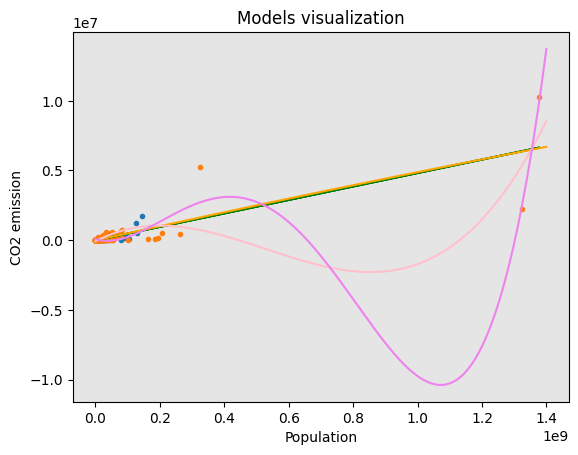

In [215]:
# Будую візуалізації моделей
x_new = np.linspace(0, 1.4e+9, 10000)

plt.plot(x_p_test, y_test, '.')
plt.plot(x_p_train, y_train, '.')
plt.plot(x_p_train, lre.predict(x_p_train), color='g')
plt.plot(x_new, p2(x_new), color='orange')
plt.plot(x_new, p3(x_new), color='pink')
plt.plot(x_new, p4(x_new), color='violet')

plt.title("Models visualization")
ax = plt.gca()
ax.set_facecolor((0.898, 0.898, 0.898))
fig = plt.gcf()
plt.xlabel('Population')
plt.ylabel("CO2 emission")

plt.show()
plt.close()


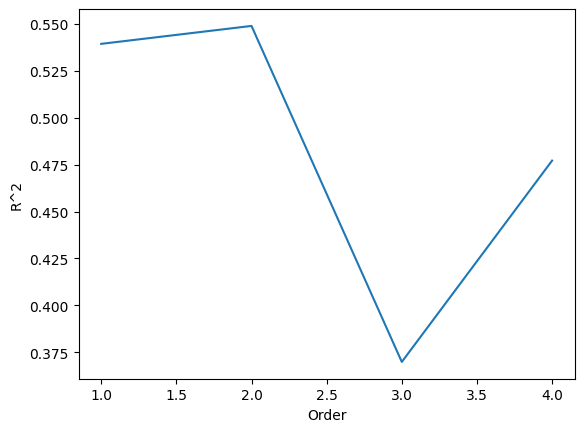

In [216]:
# Будую візуалізацію залежності R^2 або MSE від порядку поліному моделі
plt.plot([1,2,3,4], [r1,r2,r3,r4], '-')
plt.xlabel('Order')
plt.ylabel("R^2")
plt.show()
plt.close()

Найкращою є модель 2 ступеня, для третього ступеня спостерігається значний упадок ефективності, перенавчання явно не спостерігається, бо R^2>0 для всіх моделей.


<a name="task4"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4">Завдання  #4: </h2>

<p>Побудуйте модель гребеневої регресії для двох найкращих предикторів. Параметр alpha повинен бути встановлений на 10. Обчисліть R^2.</p>
</div>


Будую модель гребеневої регресії, обчислюю R^2


In [217]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [218]:
# Виконую поліноміальне перетворення 2 ступеня для двох обраних ознак
pr=PolynomialFeatures(degree=2)
x_pr_train=pr.fit_transform(x_train[['Population','Area']])
x_pr_test=pr.fit_transform(x_test[['Population','Area']])

In [219]:
# Створюю об’єкт гребеневої регресії, встановивши параметр alpha=10
RigeModel=Ridge(alpha=10)
RigeModel.fit(x_pr_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.5047e-36): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=10)

In [ ]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_pr_train, y_train)
    test_score, train_score = RigeModel.score(x_pr_test, y_test), RigeModel.score(x_pr_train, y_train)

    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

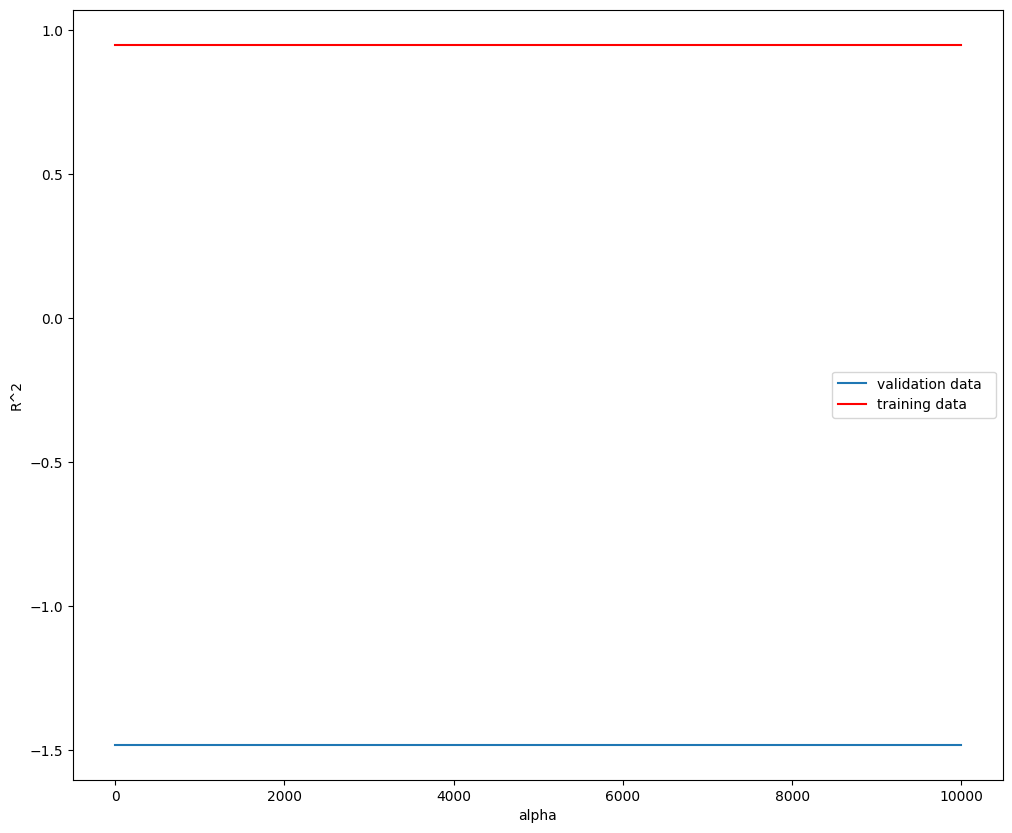

In [221]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

<a name="task5"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5">Завдання  #5: </h2>

<p>Виконайте пошук по сітці для параметра alpha та параметра нормалізації, а потім побудуйте модель, використавши найкращі значення параметрів.</p>
</div>


In [222]:
from sklearn.model_selection import GridSearchCV

Створюю словник значень параметрів:


In [223]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 1000000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]

Створюю об’єкт сітки пошуку параметра гребеневої регресії:


In [224]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
RR=Ridge()
RR
Grid1 = GridSearchCV(RR, parameters1, cv=4)

Підбираю модель:


In [225]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
Grid1.fit(x_data[['Population', 'Area']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}])

Отримую модель з найкращими параметрами:


In [226]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=1000000)

Тестую модель на тестових даних (обчислюю R^2):


In [227]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
BestRR.score(x_test[['Population', 'Area']], y_test)

0.3782092143399596

<a name="task6"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Побудуйте візуалізації для оцінки якості моделей (лінійної, кращої з поліноміальних та кращої з гребеневих), всі розмістіть на одній координатній сітці для зручного порівняння.</p>
</div>


Використаю метод "predict", щоб спрогнозувати результати, а потім скористаюсь функцією "DistributionPlot", щоб відобразити розподіл прогнозованих результатів для тестових даних порівняно з фактичними для тестових даних.


In [228]:
# Напишіть ваш код нижче та натисніть Shift+Enter для виконання
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
  width = 12
  height = 10
  plt.figure(figsize=(width, height))
  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
  ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)
  plt.title(Title)
  plt.show()
  plt.close()

<ipython-input-228-80ba1220ec35>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
<ipython-input-228-80ba1220ec35>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName

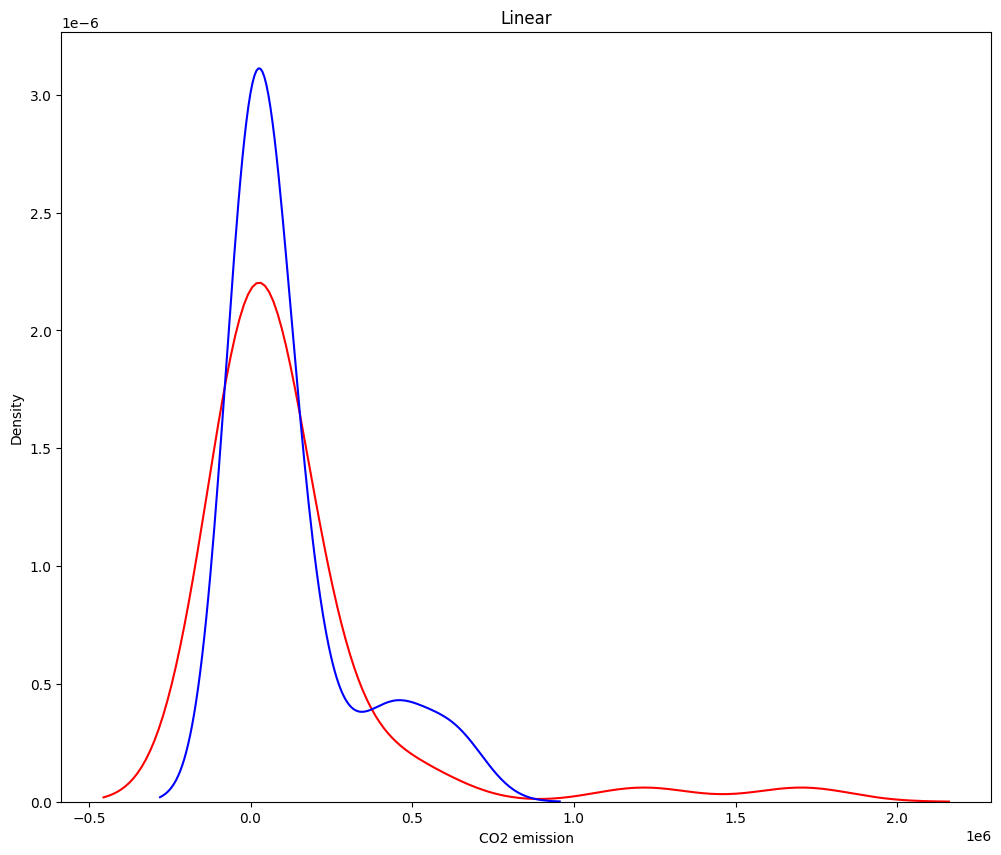

In [229]:
DistributionPlot(y_test, hat1, 'real', 'model', 'Linear')

<ipython-input-228-80ba1220ec35>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
<ipython-input-228-80ba1220ec35>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName

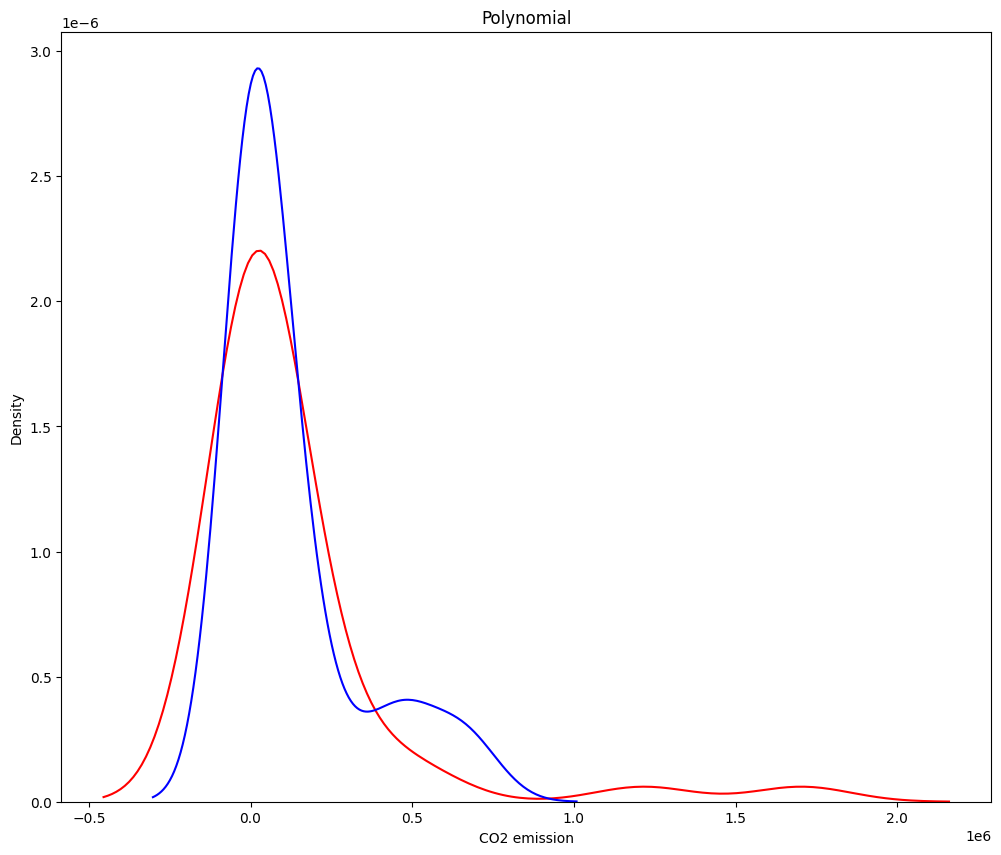

In [230]:
DistributionPlot(y_test, p2(x_p_test), 'real', 'model', 'Polynomial')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.5047e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
<ipython-input-228-80ba1220ec35>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
<ipython-input-228-80ba1220ec35>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel

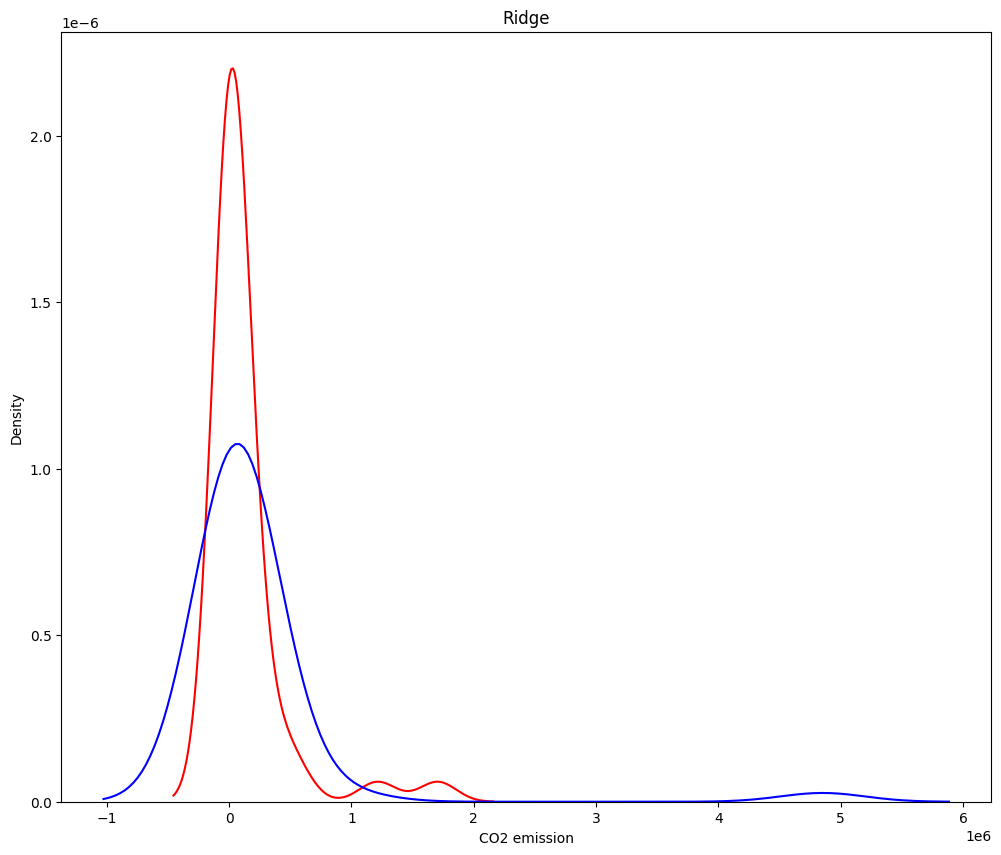

In [231]:
RigeModel=Ridge(alpha=1000000)
RigeModel.fit(x_pr_train, y_train)
DistributionPlot(y_test, RigeModel.predict(x_pr_test), 'real', 'model', 'Ridge')

<h4>Висновок</h4>

<p>Порівнюючи всі моделі, роблю висновок, що <b>модель p2 (Поліноміальна модель другого порядку) є найкращою моделлю</b> для прогнозування 'CO2 emission' на основі нашого набору даних. </p>

<h2>Виконав студент групи ІП-24 <br> Новиков Гліб</h2>
